In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def plot_time_varying_weights(true_weights, results, rw_ashwood, T):
    """
    Plots the time-varying weights for the home state and water state, comparing true and recovered weights using the simple method and Ashwood et al. method.

    Parameters:
    - true_weights: numpy array of shape (T, num_maps), the true time-varying weights
    - rw_simple: numpy array of shape (T, num_maps), the recovered time-varying weights using the simple method
    - rw_ashwood: numpy array of shape (T, num_maps), the recovered time-varying weights using the Ashwood et al. method
    - T: int, number of time steps
    """
    # Enable LaTeX rendering
    plt.rcParams.update({
        "text.usetex": True,  # Use LaTeX for text rendering
        "font.family": "serif",  # Use a serif font
        "font.serif": ["Computer Modern"],  # Default LaTeX font
    })
    fig = plt.figure(figsize=(20, 8))
 
    standardized_results = []
    # Standardize
    standardized_true_home = (true_weights[:, 0] - np.mean(true_weights[:, 0])) / np.std(true_weights[:, 0])
    standardized_ashwood_home = (rw_ashwood[:, 0] - np.mean(rw_ashwood[:, 0])) / np.std(rw_ashwood[:, 0])
    standardized_true_water = (true_weights[:, 1] - np.mean(true_weights[:, 1])) / np.std(true_weights[:, 1])
    standardized_ashwood_water = (rw_ashwood[:, 1] - np.mean(rw_ashwood[:, 1])) / np.std(rw_ashwood[:, 1])

    for (label, rw_simple) in results:
        standardized_simple_home = (rw_simple[:, 0] - np.mean(rw_simple[:, 0])) / np.std(rw_simple[:, 0])
        standardized_simple_water = (rw_simple[:, 1] - np.mean(rw_simple[:, 1])) / np.std(rw_simple[:, 1])
        standardized_results.append((label, standardized_simple_home,  standardized_simple_water))

    # Calculate RMS errors
    # rms_error_simple_home = np.sqrt(np.mean((standardized_true_home - standardized_simple_home) ** 2))
    rms_error_ashwood_home = np.sqrt(np.mean((standardized_true_home - standardized_ashwood_home) ** 2))
    # rms_error_simple_water = np.sqrt(np.mean((standardized_true_water - standardized_simple_water) ** 2))
    rms_error_ashwood_water = np.sqrt(np.mean((standardized_true_water - standardized_ashwood_water) ** 2))

    for (label, standardized_simple_home, _) in standardized_results:
        rms_error_simple_home = np.sqrt(np.mean((standardized_true_home - standardized_simple_home) ** 2))
        print(f"RMS Error for Home State ({label}): {rms_error_simple_home}")

    print(f"RMS Error for Home State (Ashwood Method): {rms_error_ashwood_home}")
    for (label, _, standardized_simple_water) in standardized_results:
        rms_error_simple_water = np.sqrt(np.mean((standardized_true_water - standardized_simple_water) ** 2))
        print(f"RMS Error for Water State ({label}): {rms_error_simple_water}")
    print(f"RMS Error for Water State (Ashwood Method): {rms_error_ashwood_water}")

    # First subplot
    ax1 = plt.subplot(1, 2, 1)
    line1, = ax1.plot(range(T), standardized_true_home, label=r'\textbf{True Reward}', linestyle='-', linewidth=5)
    lines = [line1]

    for (label, standardized_simple_home, _) in standardized_results:
        line, = ax1.plot(range(T), standardized_simple_home, label=f"Recovered Reward - {label}", linestyle=':', linewidth=4)
        lines.append(line)

    line_ashwood, = ax1.plot(range(T), standardized_ashwood_home, label=r'\textbf{dynamic\_irl (Ashwood et al., 2022)}', linestyle='-.', linewidth=2)
    lines.append(line_ashwood)

    ax1.set_xlabel(r'\textbf{Time}', fontsize=26)
    ax1.set_ylabel(r'\textbf{Weight}', fontsize=26)
    ax1.tick_params(axis='both', labelsize=16)
    ax1.grid(True, linestyle='-', alpha=0.7)

    # Second subplot
    ax2 = plt.subplot(1, 2, 2)
    ax2.plot(range(T), standardized_true_water, linestyle='-', linewidth=5)
    for (_, _, standardized_simple_water) in standardized_results:
        ax2.plot(range(T), standardized_simple_water, linestyle=':', linewidth=4)
    ax2.plot(range(T), standardized_ashwood_water, linestyle='-.', linewidth=2)

    ax2.set_xlabel(r'\textbf{Time}', fontsize=26)
    ax2.set_ylabel(r'\textbf{Weight}', fontsize=26)
    ax2.tick_params(axis='both', labelsize=16)
    ax2.grid(True, linestyle='-', alpha=0.7)

    # Shared legend
    labels = [line.get_label() for line in lines]
    fig.legend(lines, labels, loc='lower center', bbox_to_anchor=(0.5, -0.12), ncol=2, fontsize=26, frameon=True)

    plt.tight_layout(rect=[0, 0.05, 1, 1])  # Leave room at the bottom for the legend
    # # Create directories if they don't exist
    # if not os.path.exists("results"):
    #     os.makedirs("results")
    # if not os.path.exists("results/problem3"):
    #     os.makedirs("results/problem3")

    # # Generate a timestamp
    # timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Save the figure with a timestamp
    plt.savefig(f"problem3/exp3.png", dpi=300, bbox_inches='tight')

RMS Error for Home State (True Policy): 0.3700484625476559
RMS Error for Home State (30M): 0.36391639958012817
RMS Error for Home State (Ashwood Method): 0.18770283687156092
RMS Error for Water State (True Policy): 0.25981239469721423
RMS Error for Water State (30M): 0.2588624238820524
RMS Error for Water State (Ashwood Method): 0.2809614640036762


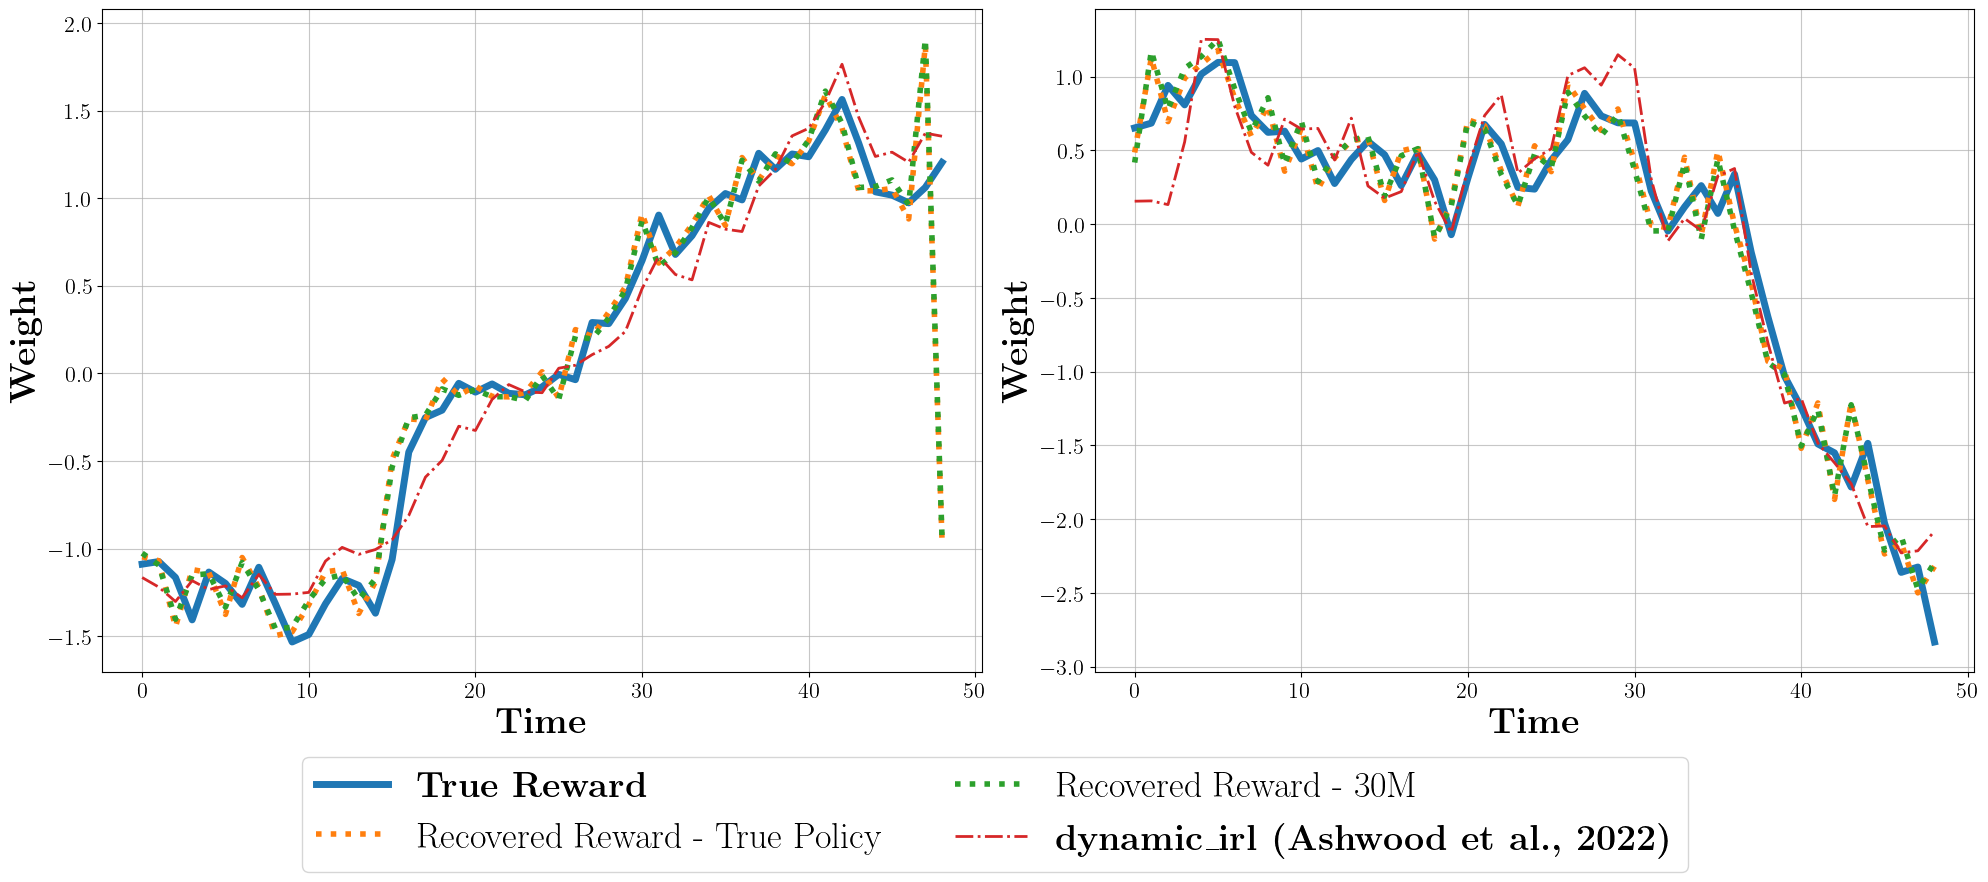

In [14]:
import pickle

with open('../saved_objects.pkl', 'rb') as f:
    time_varying_weights = pickle.load(f)
    results = pickle.load(f)
    rw_ashwood = pickle.load(f)
    T = pickle.load(f)

plot_time_varying_weights(time_varying_weights, results, rw_ashwood, T)

In [4]:
seed_list = [1, 2, 3]
num_traj_list = [1_000_000, 2_000_000, 4_000_000]
num_traj_extended_list = [12_000_000, 16_000_000, 24_000_000]#, 36_000_000, 48_000_000, 60_000_000, 120_000_000, 240_000_000]

for seed in seed_list:
    true_switches = np.load(f"../../data/rewards/switch_{seed}.npy")
    print(seed, true_switches)
    for num_trajectories in num_traj_extended_list[::-1]:
        true_switches = np.load(f"{seed=}, {num_trajectories=}_switches.npy")
        print(num_trajectories, true_switches)
    for num_trajectories in num_traj_list[::-1]:
        true_switches = np.load(f"{seed=}, {num_trajectories=}.npy")
        print(num_trajectories, true_switches)

FileNotFoundError: [Errno 2] No such file or directory: '../../data/rewards/switch_1.npy'

In [ ]:
seed_list = [1, 2,  3]
num_traj_list = [1_000_000, 2_000_000, 4_000_000, 8_000_000, 16_000_000]
# num_traj_extended_list = [12_000_000, 16_000_000, 24_000_000, 36_000_000, 48_000_000, 60_000_000, 120_000_000, 240_000_000]
for seed in seed_list:
    true_switches = np.load(f"../../data/rewards/switch_{seed}.npy")
    print(seed, true_switches)
    for num_trajectories in num_traj_list[::-1]:
        true_switches = np.load(f"../problem1_new_bound/{seed=}, {num_trajectories=}_switches.npy")
        print(num_trajectories, true_switches)

## Better rewards

In [2]:
def generate_labels(T, switch_times):
    """
    Generate a label list of length T based on switch times.

    Parameters:
    - T (int): Total length of the list.
    - switch_times (list of int): Sorted list of switch times [t1, t2, ..., tk].

    Returns:
    - labels (list of int): A list of labels from 0 to k, each assigned to a segment.
    """
    labels = [0] * T
    current_label = 0
    start = 0

    for switch_time in switch_times:
        for i in range(start, switch_time):
            labels[i] = current_label
        current_label += 1
        start = switch_time

    # Fill the last segment
    for i in range(start, T):
        labels[i] = current_label

    return labels

In [6]:
number_of_switches = 5
seed_list = list(range(1, 11))
# num_traj_list = [200_000, 400_000, 800_000, 1_000_000, 2_000_000, 4_000_000, 8_000_000]
num_traj_list = [8_000_000]
T = 50

# num_traj_extended_list = [12_000_000, 16_000_000, 24_000_000, 36_000_000, 48_000_000, 60_000_000, 120_000_000, 240_000_000]
for seed in seed_list:
    true_switches = np.load(f"../data/rewards/switch_{seed}_{number_of_switches}.npy")
    print(seed, true_switches)
    for num_trajectories in num_traj_list[::-1]:
        true_switches = np.load(f"problem1_new_rewards/{seed=}, {num_trajectories=}_switches.npy")
        print(num_trajectories, true_switches)
        print(generate_labels(50, true_switches))

1 [ 3 23 25 36 40]
8000000 [ 3 23 25 36 40]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
2 [13 17 24 36 43]
8000000 [13 17 24 36 43]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5]
3 [19 24 28 36 45]
8000000 [19 24 28 36 45]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5]
4 [ 5 16 33 39 46]
8000000 [ 5 16 33 39 46]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5]
5 [ 7 18 24 27 29]
8000000 [ 7 18 24 27 29]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
6 [ 8 24 37 39 47]
800000

In [7]:
from sklearn.metrics import adjusted_rand_score

T = 50
number_of_switches = 5
seed_list = list(range(1, 11))
num_traj_list = [200_000, 400_000, 800_000, 1_000_000, 2_000_000, 4_000_000, 8_000_000]
# num_traj_extended_list = [12_000_000, 16_000_000, 24_000_000, 36_000_000, 48_000_000, 60_000_000, 120_000_000, 240_000_000]


rand_scores = {x:[] for x in num_traj_list}
switch_count = {x:[] for x in num_traj_list}

for num_trajectories in num_traj_list[::-1]:
    for seed in seed_list:
        switches = np.load(f"problem1_new_rewards/{seed=}, {num_trajectories=}_switches.npy")
        true_switches = np.load(f"../data/rewards/switch_{seed}_{number_of_switches}.npy")
        ari = adjusted_rand_score(generate_labels(T, true_switches), generate_labels(T, switches))
        rand_scores[num_trajectories].append(ari)
        switch_count[num_trajectories].append(len(switches))

In [4]:
np.load("../data/rewards/reward_skewed_11_1.npy")[1]
 

array([[0.        , 0.        , 0.        , 0.02904614, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.07287898, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.09738502, 0.        ],
       [0.01105235, 0.        , 0.        , 0.        , 0.        ],
       [0.92225249, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.02844801, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.02280654, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.00961634, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.04574117, 0.

In [1]:
x_sorted

NameError: name 'x_sorted' is not defined

In [6]:
y_std_sorted

(0.09808519136719979,
 0.1956610620977039,
 0.1787609267463572,
 0.10032913827381693,
 0.11821015516705351,
 0.0403204631297445,
 0.0)

In [8]:
# Prepare sorted data with mean and std dev
x = []
y_mean = []
y_std = []
for num_trajectories, scores in switch_count.items():
    x.append(num_trajectories)
    y_mean.append(np.mean(scores))
    y_std.append(np.std(scores))

# Sort by x
sorted_data = sorted(zip(x, y_mean, y_std))
x_sorted, y_mean_sorted, y_std_sorted = zip(*sorted_data)

In [10]:
y_mean_sorted

(1.1, 2.0, 3.0, 3.5, 4.1, 4.8, 5.0)

In [11]:
y_std_sorted

(0.3,
 0.6324555320336759,
 0.4472135954999579,
 0.5,
 0.3,
 0.39999999999999997,
 0.0)

In [9]:
x_sorted

(200000, 400000, 800000, 1000000, 2000000, 4000000, 8000000)

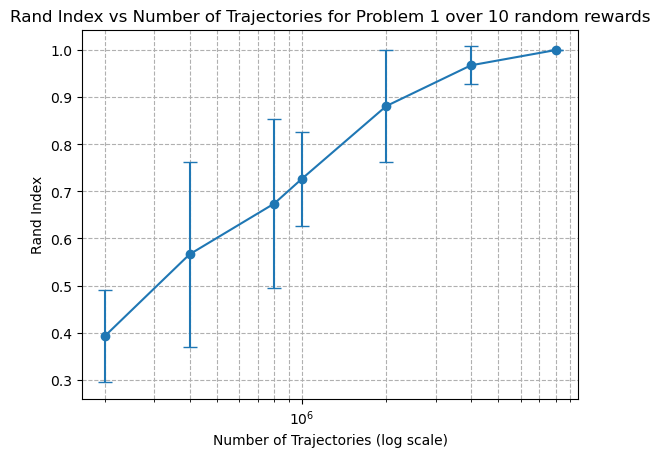

In [ ]:
# Prepare sorted data with mean and std dev
x = []
y_mean = []
y_std = []
for num_trajectories, scores in rand_scores.items():
    x.append(num_trajectories)
    y_mean.append(np.mean(scores))
    y_std.append(np.std(scores))

# Sort by x
sorted_data = sorted(zip(x, y_mean, y_std))
x_sorted, y_mean_sorted, y_std_sorted = zip(*sorted_data)

# Plot with error bars and log-scaled x-axis
plt.errorbar(x_sorted, y_mean_sorted, yerr=y_std_sorted, fmt='-o', capsize=5)
plt.xscale('log')
plt.xlabel('Number of Trajectories (log scale)')
plt.ylabel('Rand Index')
plt.title('Rand Index vs Number of Trajectories for Problem 1 over 10 random rewards')
plt.grid(True, which="both", ls="--")
plt.show()
